<a href="https://colab.research.google.com/github/SabrinaDantas/projeto_estatistica_aplicada_pucrs/blob/main/projeto_estatistica_aplicada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto - Estatística Aplicada



## Bibliotecas


As bibliotecas desempenham um papel essencial na expansão das capacidades da linguagem R e são fundamentais para realizar análises de dados complexas e visualizações informativas.

<small>*Para uma leitura, este passo pode ser desconsiderado devido à demora.*</small>


In [ ]:
install.packages(c('skimr', 'tidyverse'), dep = TRUE)

library(skimr)
library(tidyverse)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## 1. Fase 1

### 1.1 Leitura do Banco de Dados

A base de dados refere-se a [*Jogadores Registrados na FIFA*](https://raw.githubusercontent.com/filipezabala/pucrs-tecnologo-bd/main/dados/Anexo_Projeto_fifa_world_national_teams_versa%CC%83o_oficial%2020241.csv) , em formado CSV. A leitura será realizada através da URL utilizando a função ***read.csv( )***.

In [ ]:
url_fifa <- 'https://raw.githubusercontent.com/filipezabala/pucrs-tecnologo-bd/main/dados/Anexo_Projeto_fifa_world_national_teams_versa%CC%83o_oficial%2020241.csv'
df_fifa <- read.csv(url_fifa, header = TRUE, sep = ';')

### 1.2 Análise da Estrutura

A análise da estrutura de dados é importante para compreender, identificar possíveis problemas, selecionar variáveis relevantes, preparar os dados e planejar a análise. Em R, utiliza-se a função ***str( )***.

In [ ]:
str(df_fifa)
# head(df_fifa)

'data.frame':	718 obs. of  30 variables:
 $ id                           : int  158023 153079 211110 201399 226226 199667 212616 216816 183892 231478 ...
 $ name                         : chr  "Messi" "Aguero" "Dybala" "Icardi" ...
 $ full_name                    : chr  "Lionel Andr\xe9s Messi Cuccittini" "Sergio Leonel Ag\xfcero del Castillo" "Paulo Bruno Exequiel Dybala" "Mauro Emanuel Icardi Rivero" ...
 $ overall_rating               : int  94 89 89 87 82 77 77 78 79 79 ...
 $ value_euro                   : int  110500000 64500000 89000000 64500000 30000000 8500000 12000000 15000000 8500000 18000000 ...
 $ wage_euro                    : int  565000 300000 205000 130000 83000 28000 27000 53000 19000 54000 ...
 $ nationality                  : chr  "Argentina" "Argentina" "Argentina" "Argentina" ...
 $ national_team                : chr  "Argentina" "Argentina" "Argentina" "Argentina" ...
 $ club_team                    : chr  "FC Barcelona" "Manchester City" "Juventus" "Inter" ...
 

No banco de dados da FIFA, temos 718 linhas e 30 variáveis que foram classificadas corretamente. Para prosseguir com a análise de possíveis problemas, será verificado a presença de valores ausentes.

In [ ]:
sum(is.na(df_fifa))

[1] 0

Não foi localizado a presença de valores ausentes no banco de dados.


### 1.3 Tipos de Variáveis


1. **Qualitativa Nominal:** Nacionalidade - (`nationality`)

2. **Qualitativa Ordinal:** Não localizada

3. **Quantitativa Discreta:** Reputação em uma escala de 1 (pior) até 5 (melhor) - (`international_reputation.1.5`)

4. **Quantitativa Contínua:** Peso em KG - (`weight_kgs`)





### 1.4 Estatística Descritiva


A estatística descritiva é importante para resumir e descrever características importantes de um conjunto de dados. Em R, podemos usar a função ***summary( )*** para realizar essa tarefa. Antes disso, será realizado um filtro das colunas que são do tipo inteiro, sendo excluída a coluna **id**.

In [ ]:
filter_int <- sapply(df_fifa, is.integer)  #Filtro do tipo inteiro
sem_coluna_id <- df_fifa[, which(filter_int)[2:25]] # Retirado a coluna ID da análise

summary(sem_coluna_id)

 overall_rating    value_euro          wage_euro           age       
 Min.   :58.00   Min.   :   230000   Min.   :  1000   Min.   :18.00  
 1st Qu.:72.00   1st Qu.:  3325000   1st Qu.: 10000   1st Qu.:24.00  
 Median :76.00   Median :  8000000   Median : 27000   Median :26.00  
 Mean   :76.46   Mean   : 13897695   Mean   : 49560   Mean   :26.57  
 3rd Qu.:80.00   3rd Qu.: 17000000   3rd Qu.: 59000   3rd Qu.:29.00  
 Max.   :94.00   Max.   :110500000   Max.   :565000   Max.   :37.00  
   height_cm     weight_kgs     international_reputation.1.5. weak_foot.1.5. 
 Min.   :152   Min.   : 59.00   Min.   :1.000                 Min.   :1.000  
 1st Qu.:170   1st Qu.: 73.00   1st Qu.:1.000                 1st Qu.:3.000  
 Median :183   Median : 77.00   Median :1.000                 Median :3.000  
 Mean   :177   Mean   : 77.67   Mean   :1.673                 Mean   :3.185  
 3rd Qu.:188   3rd Qu.: 82.00   3rd Qu.:2.000                 3rd Qu.:4.000  
 Max.   :203   Max.   :100.00   Max.   :5.

### 1.4 Tabela de Frequência


A tabela de frequências é uma ferramenta útil para analisar dados, ajuda a entender a distribuição dos dados, identificar padrões e outliers, validar os dados e tomar decisões informadas.


Para variáveis do tipo caracter (chr), a função ***sapply( )*** é empregada para criar uma tabela contendo apenas os dados desse tipo, excluindo **'name'** e '**full_name'** No entanto, em análises que envolvem um grande número de colunas, pode ser mais eficiente adotar uma abordagem diferente.

In [ ]:
sapply(df_fifa[,c("nationality", "national_team", "club_team")], table)

$nationality

          Argentina           Australia             Austria             Belgium 
                 17                  13                  16                  19 
             Brazil            Bulgaria            Cameroon              Canada 
                 23                   3                  17                  19 
              Chile            Colombia      Czech Republic             Denmark 
                 10                  12                  20                  23 
            Ecuador               Egypt             England             Finland 
                  6                   7                  23                  19 
             France             Germany              Greece             Hungary 
                 23                  23                  21                   8 
            Iceland               Italy         Ivory Coast              Mexico 
                 13                  22                  14                  10 
        Nether

Para visualizar estatísticas descritivas sobre o conjunto de dados, vamos utilizar a função **skimr**.

<small>**Lembrando: o pacote foi instalado e carregado na seção *Bibliotecas*.**</small>




In [117]:
skimr::skim(df_fifa)

Warning message:
“There was 1 warning in `dplyr::summarize()`.
ℹ In argument: `dplyr::across(tidyselect::any_of(variable_names),
  mangled_skimmers$funs)`.
ℹ In group 0: .
Caused by warning:
! There were 307 warnings in `dplyr::summarize()`.
The first warning was:
ℹ In argument: `dplyr::across(tidyselect::any_of(variable_names),
  mangled_skimmers$funs)`.
Caused by warning in `grepl()`:
! unable to translate 'Mart<ed>nez' to a wide string
ℹ Run `dplyr::last_dplyr_warnings()` to see the 306 remaining warnings.”


── Data Summary ────────────────────────
                           Values 
Name                       df_fifa
Number of rows             718    
Number of columns          31     
_______________________           
Column type frequency:            
  character                5      
  numeric                  26     
________________________          
Group variables            None   

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate min max empty n_unique whitespace
1 name                  0             1   2  16     0      687          0
2 full_name             0             1   8  42     0      718          0
3 nationality           0             1   4  19     0       45          0
4 national_team         0             1   4  19     0       45          0
5 club_team             0             1   3  29     0      227          0

── Variable type: numeric ──────────────────────────────────────────────────────
 

ERROR: Error in is.null(text_repr) || nchar(text_repr) == 0L: 'length = 17' in coercion to 'logical(1)'


A análise do valor do jogador no mercado (`value_euro`) em relação á nacionalidade (`nationality`) é importante para verificar disparidades econômicas, o desenvolvimento do futebol, tendências de mercado e estratégias de recrutamento, auxiliando na tomada de decisão. Por exemplo, é observado que um jogador da **Nova Zelândia** possui o **menor valor de mercado em Euros**, enquanto um jogador da **Argentina** possui o **maior valor de mercado em Euros**.

In [119]:
# df_fifa$value_euro_milhao <- df_fifa$value_euro/1000000
by(df_fifa$value_euro, df_fifa$nationality, summary)

df_fifa$nationality: Argentina
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
  8500000  14500000  18000000  31647059  30000000 110500000 
------------------------------------------------------------ 
df_fifa$nationality: Australia
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
  675000  2600000  3100000  4401923  5500000 13000000 
------------------------------------------------------------ 
df_fifa$nationality: Austria
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
 3800000  7375000  8500000 11612500 12625000 30500000 
------------------------------------------------------------ 
df_fifa$nationality: Belgium
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
  5000000  16750000  22000000  34131579  44500000 102000000 
------------------------------------------------------------ 
df_fifa$nationality: Brazil
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
  2700000   6750000   9000000  15339130  15250000 108000000 
------------------

### 1.5 Gráficos


 O gráfico de boxplot é uma ferramenta versátil e eficaz para explorar a distribuição e a dispersão dos dados, identificar valores discrepantes e comparar diferentes grupos de dados de forma rápida e intuitiva.

A variável escolhida para a análise é o valor do jogador no mercado em Euros. No entanto, para uma visualização mais eficaz dos gráficos, utilizou-se euros por milhão.

In [265]:
df_fifa$value_euro_milhao <- df_fifa$value_euro/1000000 #Euro por milhão

Para visualizar as estatísticas descritivas referentes ao valor do jogador no mercado, em milhões de euros, e sua nacionalidade, foi criado um gráfico de boxplot.

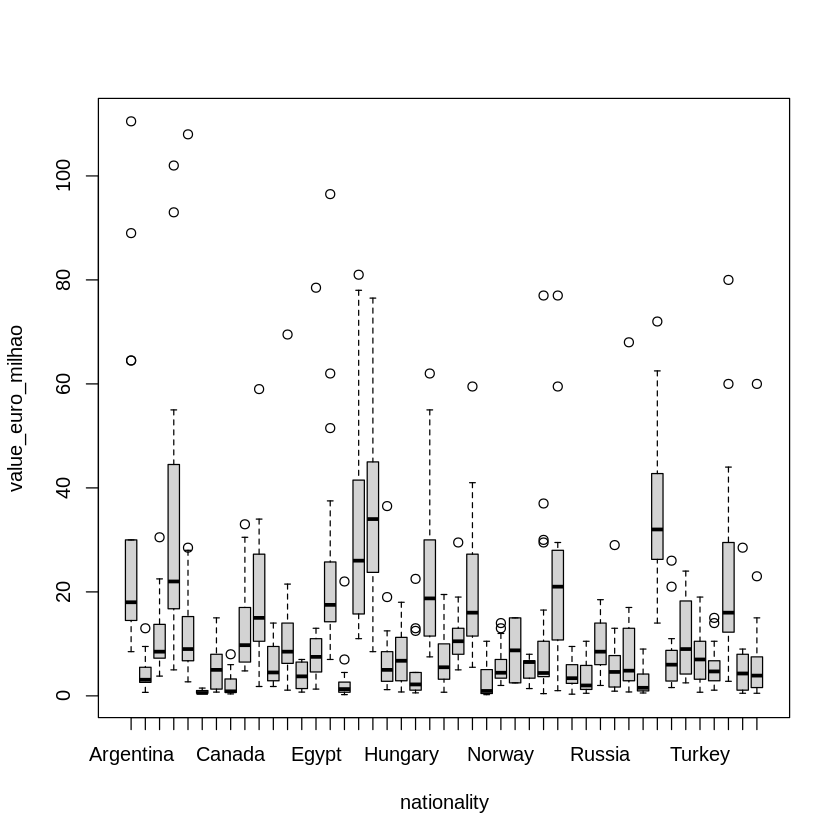

In [263]:
boxplot(value_euro_milhao ~ nationality, data = df_fifa )

Outra análise que pode ser feita é da nacionalidade pelo valor mediano do jogador no mercado, em milhões de euros. A função ***ggplot( )*** do pacote da biblioteca **tidyverse** proporciona gráficos mais estruturados

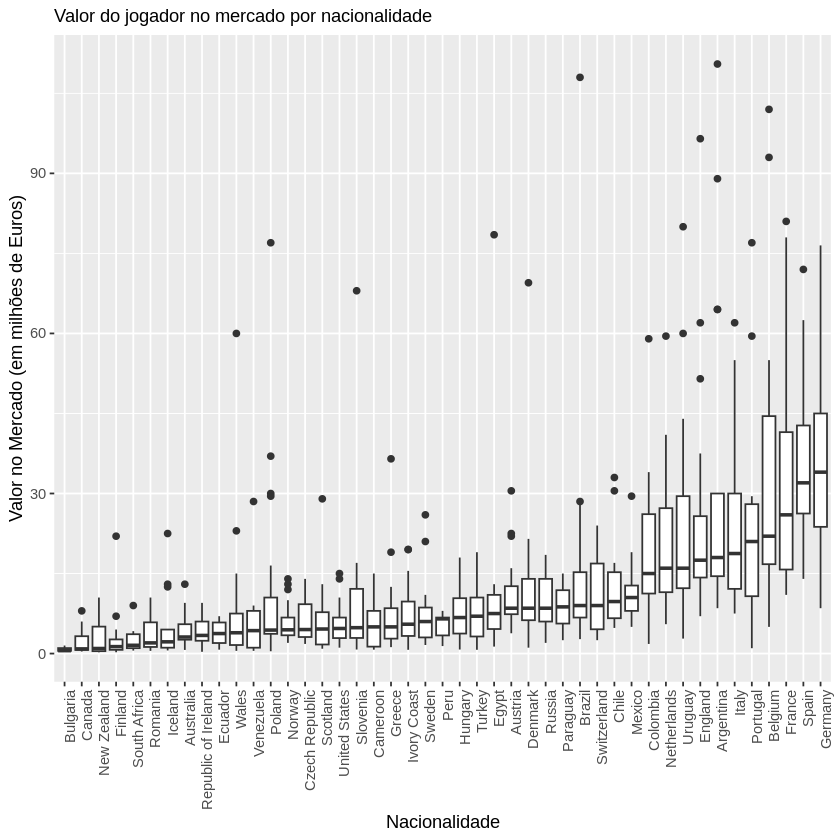

In [264]:
df_fifa %>%
  ggplot(aes(x = reorder(nationality, value_euro_milhao, median, na.rm = TRUE), y = value_euro_milhao)) +
  geom_boxplot() +
  labs(y = 'Valor no Mercado (em milhões de Euros)', x = 'Nacionalidade',
       subtitle = 'Valor do jogador no mercado por nacionalidade') +
  theme(axis.text.x = element_text(angle = 90, vjust = 1, hjust = 1))

### 1.6 Comportamento Probabilístico

Para verificar o comportamento probabilístico da variável `value_euro_milhao`, derivada da variável `value_euro`, utiliza-se a distribuição acumulada empírica e a função de distribuição acumulada teórica.

O histograma é uma ferramenta valiosa na análise exploratória de dados, fornecendo insights sobre a distribuição. Ele permite visualizar que a maioria dos jogadores possui um valor de mercado abaixo de 20 milhões de euros.

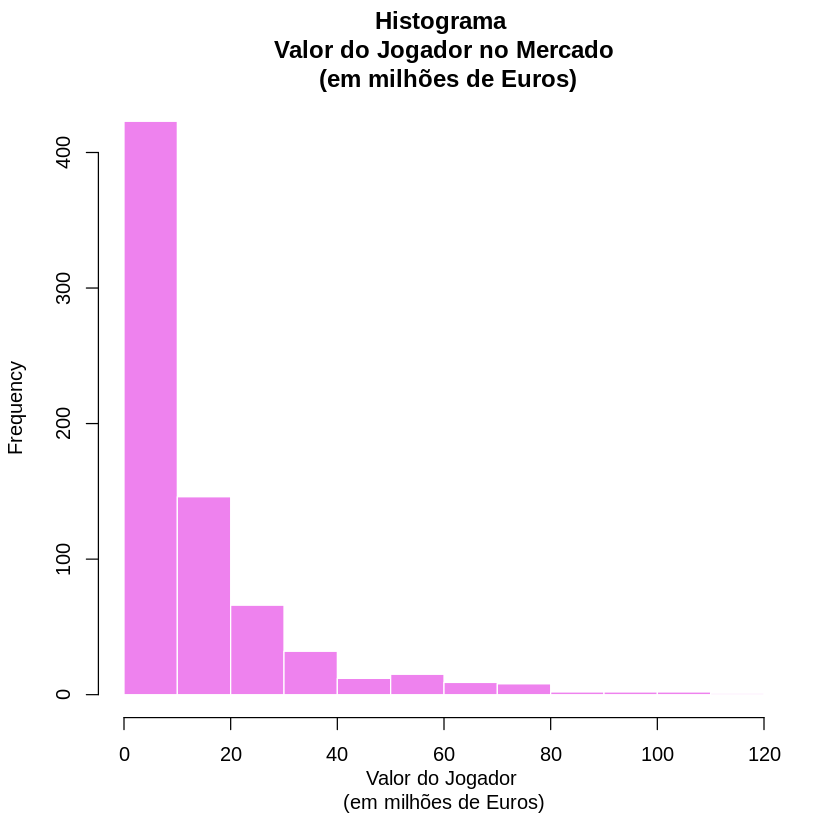

In [256]:
## Histograma
hist(df_fifa$value_euro_milhao,
main = "Histograma
 Valor do Jogador no Mercado
 (em milhões de Euros)",
xlab = "Valor do Jogador
(em milhões de Euros)",
col = "violet",
border = FALSE)


Para realizar a função de distribuição acumulada teórica é necessário calcular a média e o desvio padrão.

In [240]:
## Média
media <- mean(df_fifa$value_euro_milhao)
media_formatada <- format(media, decimal.mark = ",", big.mark = ".") # Formatando o número com pontos e vírgula para as casas decimais.
cat('Média (por milhão) = ', media_formatada)

cat('\n')

## Desvio Padrão
desvio <- sd(df_fifa$value_euro_milhao)
desvio_formatado <- format(desvio, decimal.mark = ",", big.mark = ".") # Formatando o número com pontos e vírgula para as casas decimais.
cat('Desvio Padrão Amostral (por milhão) = ', desvio_formatado)

Média (por milhão) =  13,89769
Desvio Padrão Amostral (por milhão) =  16,91751

A *distribuição acumulada empírica (ECDF)* é uma função estatística que descreve a probabilidade acumulada de uma **variável aleatória ser menor ou igual a um determinado valor observado**. Já a *função de distribuição acumulada teórica (CDF)* descreve a probabilidade acumulada de u**ma variável aleatória tomar um valor igual ou menor que um determinado valor**.

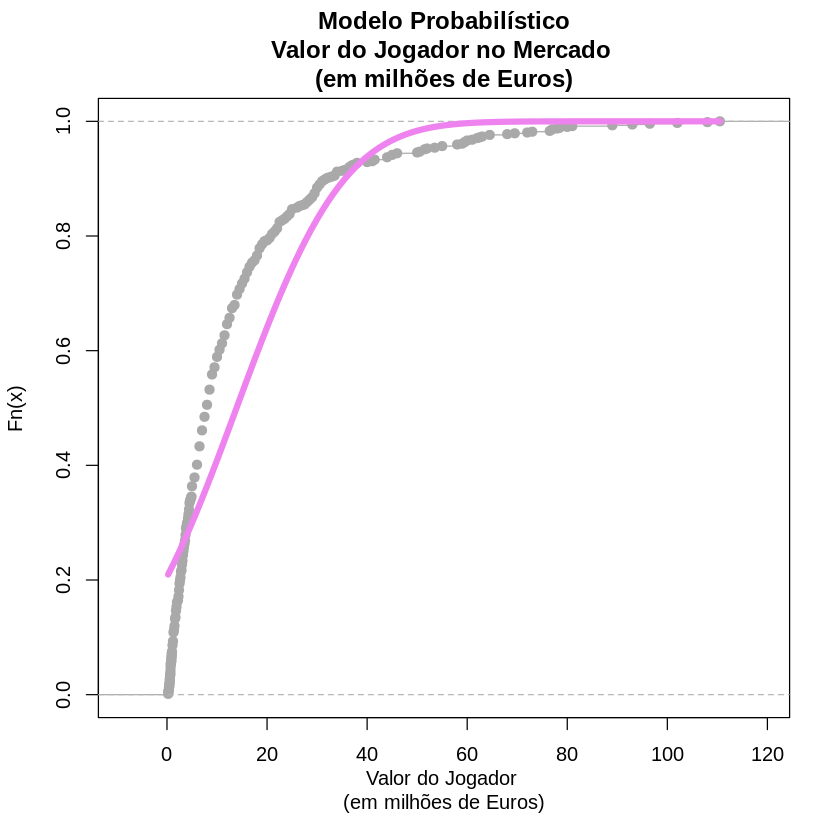

In [269]:
## Distribuição Acumulada Empírica
cs <- ecdf(df_fifa$value_euro_milhao)
plot(cs,
main = "Modelo Probabilístico
Valor do Jogador no Mercado
(em milhões de Euros)",
xlab = "Valor do Jogador
(em milhões de Euros)",
col = "darkgray")

##  Função de Distribuição Acumulada Teórica
curve(pnorm(x,media,desvio), min(df_fifa$value_euro_milhao), max(df_fifa$value_euro_milhao), add = TRUE, col = 'violet', lwd = 5)


Ao comparar o ECDF com a função CDF no gráfico acima, percebe-se que o modelo teórico é uma boa representação dos dados observados devido à proximidade das curvas.